Importo le librerie

In [2]:
import numpy as np
import tensorflow as tf
import cv2 
from random import randint

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.utils import np_utils
from keras import Input
from keras import Model
from keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

import matplotlib.pyplot as plt

Importo dataset → mnist

In [3]:
#Importo fashion mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
#concateno X e y in quanto il dataset è diviso
X = np.concatenate((X_train, X_test))
y = np.concatenate((y_train, y_test))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

X_trainC=[]
X_testC=[]
for i in range(0,X_train.shape[0],1):
  X_trainC.append(cv2.cvtColor(X_train[i], cv2.COLOR_GRAY2BGR))
for i in range(0,X_test.shape[0],1):
  X_testC.append(cv2.cvtColor(X_test[i], cv2.COLOR_GRAY2BGR))

4423680/4422102 [==============================] - 0s 0us/step


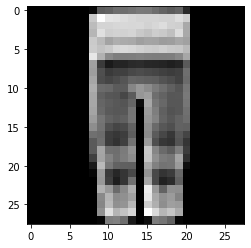

In [4]:
#X_trainC[0]
plt.imshow(X_testC[2])

In [5]:
#trasformo il vettore
#X_trainC= X_trainC.reshape(X_train.shape[0], 28, 28, 3)
#X_test = X_test.reshape(X_test.shape[0], 28, 28, 3)

In [6]:
X_trainC=np.array(X_trainC)
X_testC=np.array(X_testC)

In [7]:
X_trainC.shape, X_testC.shape, X.shape

((49000, 28, 28, 3), (21000, 28, 28, 3), (70000, 28, 28))

In [8]:
#normalizzo i valori
X_trainC = X_trainC / 255
X_testC = X_testC / 255
#converto in float
X_trainC= X_trainC.astype('float32')
X_testC= X_testC.astype('float32')

In [9]:
#codifica one hot encode
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
# shape[1] lunghezza stringa=numero di classi (10)
n_classi = y_train.shape[1]

Definisco la mia rete neurale

In [10]:
#creo modello
model = Sequential()
#convolutional layer
model.add(Conv2D(30, kernel_size=3, padding='valid', activation='relu', input_shape=(28,28,3)))
#model.add(Dropout(0.3))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(60, kernel_size=3, activation='relu'))
#model.add(Dropout(0.3))
model.add(MaxPool2D((2, 2)))
# flatten output of conv
model.add(Flatten())

# output layer
model.add(Dense(60, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

#Compilo modello
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 30)        840       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 30)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 60)        16260     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 60)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1500)              0         
_________________________________________________________________
dense (Dense)                (None, 60)                90060     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                6

Alleno la mia rete neurale

In [11]:
progress=model.fit(X_trainC, y_train, validation_data=(X_testC, y_test), epochs=10, batch_size=128, shuffle=True)

Epoch 1/10
383/383 [==============================] - 48s 125ms/step - loss: 0.8364 - accuracy: 0.7075 - val_loss: 0.3975 - val_accuracy: 0.8601
Epoch 2/10
383/383 [==============================] - 47s 124ms/step - loss: 0.3763 - accuracy: 0.8685 - val_loss: 0.3354 - val_accuracy: 0.8811
Epoch 3/10
383/383 [==============================] - 47s 123ms/step - loss: 0.3218 - accuracy: 0.8833 - val_loss: 0.3085 - val_accuracy: 0.8923
Epoch 4/10
383/383 [==============================] - 47s 123ms/step - loss: 0.2851 - accuracy: 0.8982 - val_loss: 0.3247 - val_accuracy: 0.8847
Epoch 5/10
383/383 [==============================] - 47s 124ms/step - loss: 0.2735 - accuracy: 0.9015 - val_loss: 0.2801 - val_accuracy: 0.9001
Epoch 6/10
383/383 [==============================] - 47s 123ms/step - loss: 0.2392 - accuracy: 0.9130 - val_loss: 0.2852 - val_accuracy: 0.8970
Epoch 7/10
383/383 [==============================] - 47s 124ms/step - loss: 0.2293 - accuracy: 0.9171 - val_loss: 0.2774 - val_ac

Perdita accuratezza (accuracy)

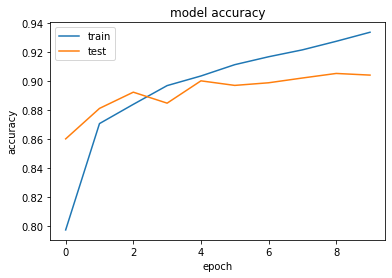

In [12]:
plt.plot(progress.history['accuracy'])
plt.plot(progress.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Perdita dell'errore (loss)

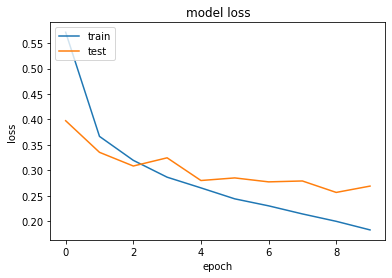

In [13]:
plt.plot(progress.history['loss'])
plt.plot(progress.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [15]:
test_predictions = model.predict_classes(X_testC, batch_size=128, verbose=0)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [16]:
test_labels=np.argmax(y_test, axis=1)

In [17]:
cm = confusion_matrix(test_labels, test_predictions)

In [18]:
cm

array([[1720,    2,   32,   39,    6,    1,  284,    0,   16,    0],
       [   1, 2061,    0,   26,    4,    0,    4,    0,    4,    0],
       [  16,    1, 1651,   18,  128,    0,  276,    0,   10,    0],
       [  13,   13,   15, 1945,   50,    0,   61,    0,    3,    0],
       [   1,    8,   53,   61, 1790,    0,  185,    0,    1,    1],
       [   1,    0,    0,    0,    0, 2043,    1,   34,    4,   17],
       [ 137,    6,   67,   46,  120,    0, 1710,    0,   14,    0],
       [   0,    0,    0,    0,    0,   18,    0, 1937,    1,  144],
       [   5,    1,    5,    5,    4,    3,   16,    4, 2057,    0],
       [   0,    0,    0,    0,    0,    5,    0,   22,    2, 2071]])

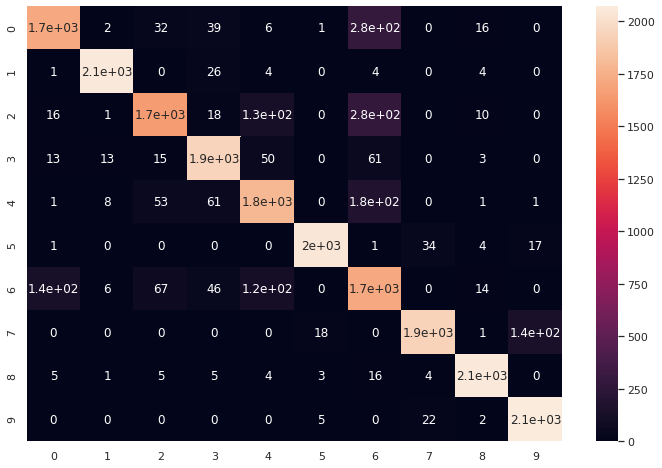

In [23]:
import seaborn as sns
sns.set(rc={'figure.figsize':(12,8)})
sns.heatmap(cm, annot=True)